In [1]:
import pandas as pd
import seaborn as sns


In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import os

In [3]:
path = Path(os.getcwd())
root_dir = path.parent.parent.absolute()

In [4]:
df = pd.read_csv(os.path.join(root_dir, "example_dataset.csv"), index_col=0)

In [5]:
df.head()

,game_name,state_dim,action_dim,agent_hidden_model_size,episode_reward,episode_length,exploration_rate,gpu_before_train,gpu_after_train,cpu_usage
0,ALE/Pong-v5,"(210, 160, 3)",6,44.303368,-20.0,0.662897,1.000000,92.913664,232.28416,6363.303936
1,ALE/Pong-v5,"(210, 160, 3)",6,44.303368,-20.0,0.760585,0.432751,232.284160,232.28416,6484.316160
2,ALE/Pong-v5,"(210, 160, 3)",6,44.303368,-21.0,0.680926,0.223026,232.284160,232.28416,6559.887360
3,ALE/Pong-v5,"(210, 160, 3)",6,44.303368,-21.0,0.807597,0.145486,232.284160,232.28416,6662.815744
4,ALE/Pong-v5,"(210, 160, 3)",6,44.303368,-21.0,0.692958,0.116817,232.284160,232.28416,6758.293504


## 1. Episode Rewared Over time

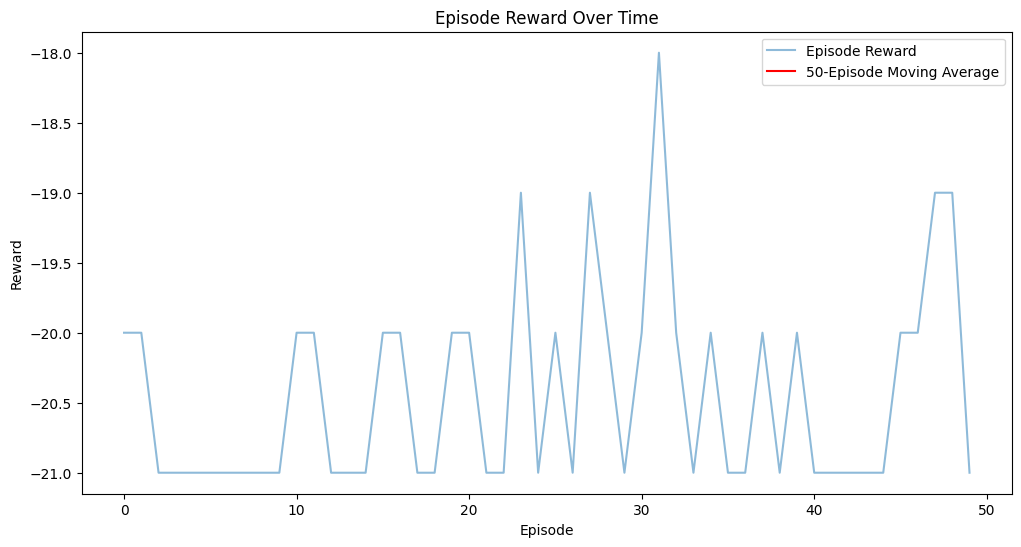

In [6]:
# Assume your data is in a DataFrame called df and that each row represents an episode.
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['episode_reward'], label='Episode Reward', alpha=0.5)
plt.plot(df['episode_reward'].rolling(window=50).mean(), label='50-Episode Moving Average', color='red')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode Reward Over Time')
plt.legend()
plt.show()

## 2. Episode Length vs. Episode Reward

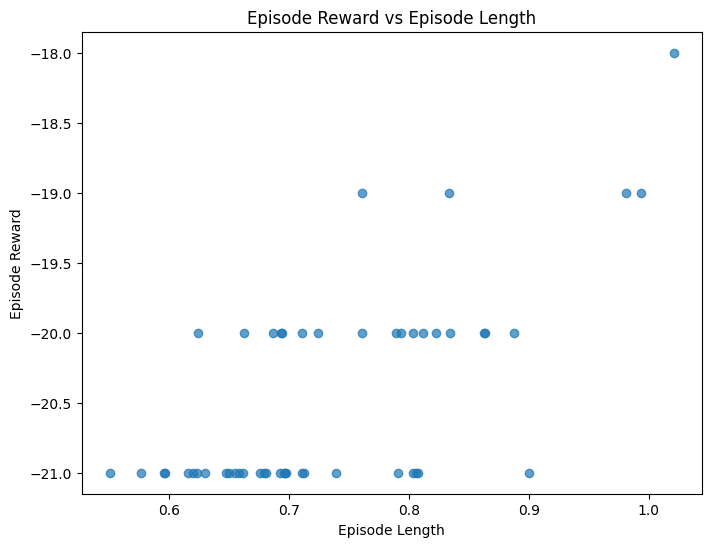

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(df['episode_length'], df['episode_reward'], alpha=0.7)
plt.xlabel('Episode Length')
plt.ylabel('Episode Reward')
plt.title('Episode Reward vs Episode Length')
plt.show()

## 3. Exploration Rate Analysis

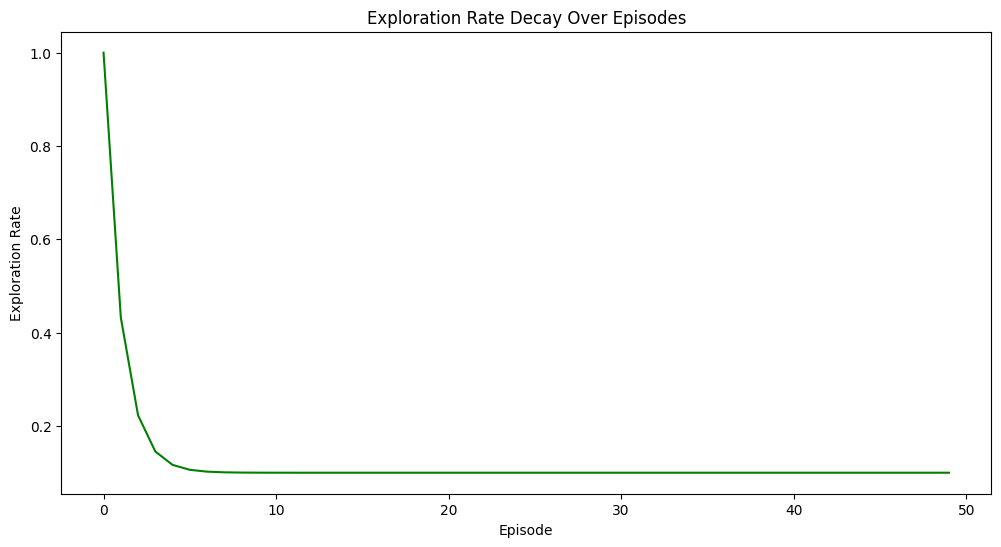

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['exploration_rate'], color='green')
plt.xlabel('Episode')
plt.ylabel('Exploration Rate')
plt.title('Exploration Rate Decay Over Episodes')
plt.show()


## 4. GPU Usage Before and After Training

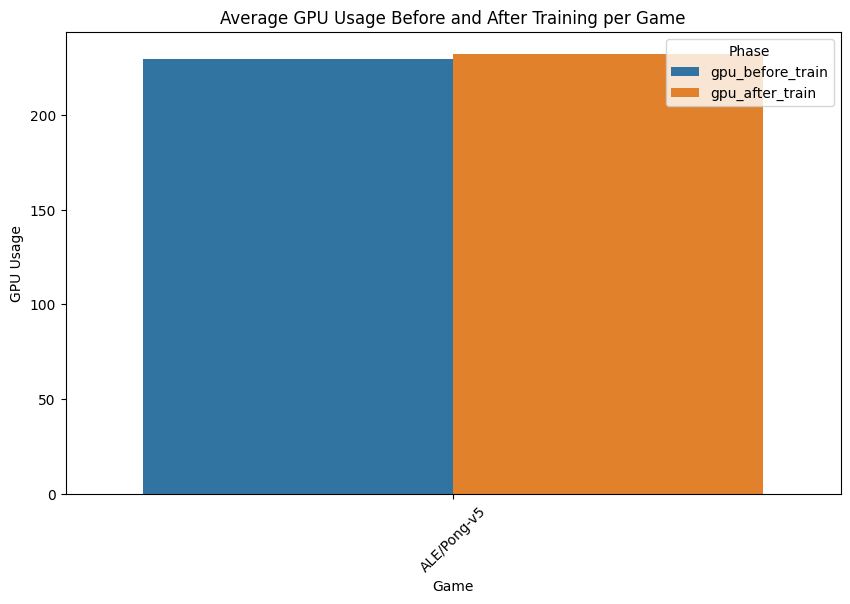

In [9]:
# Group by game_name and compute the mean GPU usage before and after training.
gpu_usage = df.groupby('game_name')[['gpu_before_train', 'gpu_after_train']].mean().reset_index()

# Melt the DataFrame for easier plotting with Seaborn.
gpu_usage_melted = gpu_usage.melt(id_vars='game_name', var_name='Phase', value_name='GPU Usage')

plt.figure(figsize=(10, 6))
sns.barplot(x='game_name', y='GPU Usage', hue='Phase', data=gpu_usage_melted)
plt.title('Average GPU Usage Before and After Training per Game')
plt.xlabel('Game')
plt.ylabel('GPU Usage')
plt.xticks(rotation=45)
plt.show()


## 5. CPU Usage Over Episodes

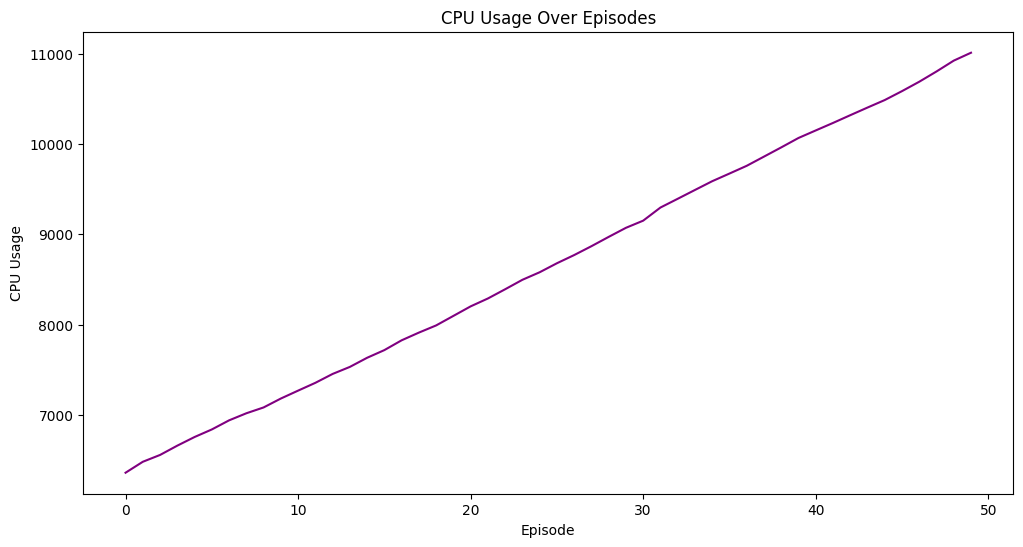

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cpu_usage'], color='purple')
plt.xlabel('Episode')
plt.ylabel('CPU Usage')
plt.title('CPU Usage Over Episodes')
plt.show()

## 6. Correlation Analysis

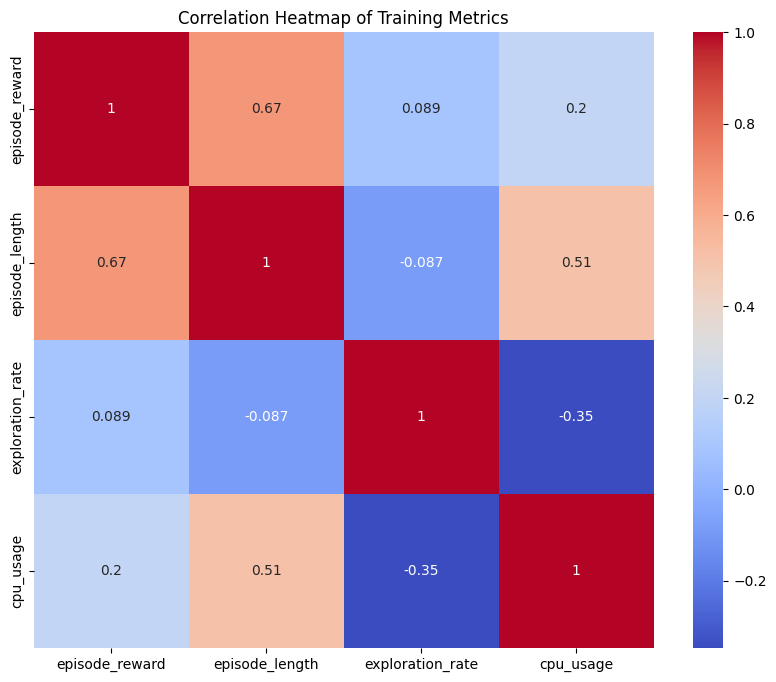

In [11]:
plt.figure(figsize=(10, 8))
# Select the columns of interest.
metrics = df[['episode_reward', 'episode_length', 'exploration_rate', 'cpu_usage']]
corr_matrix = metrics.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Training Metrics')
plt.show()


## 7. Hyperparameter Summary

In [15]:
# Create a summary table grouped by game_name.
hyperparams = df.groupby('game_name')[['state_dim', 'action_dim', 'agent_hidden_model_size']].first()
print(hyperparams)

                 state_dim  action_dim  agent_hidden_model_size
game_name                                                      
ALE/Pong-v5  (210, 160, 3)           6                44.303368


## 8. Benchmark Memory Consumption

/tmp/ipykernel_30914/969250980.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='game_name', y='gpu_memory_used', data=memory_usage, palette='viridis')


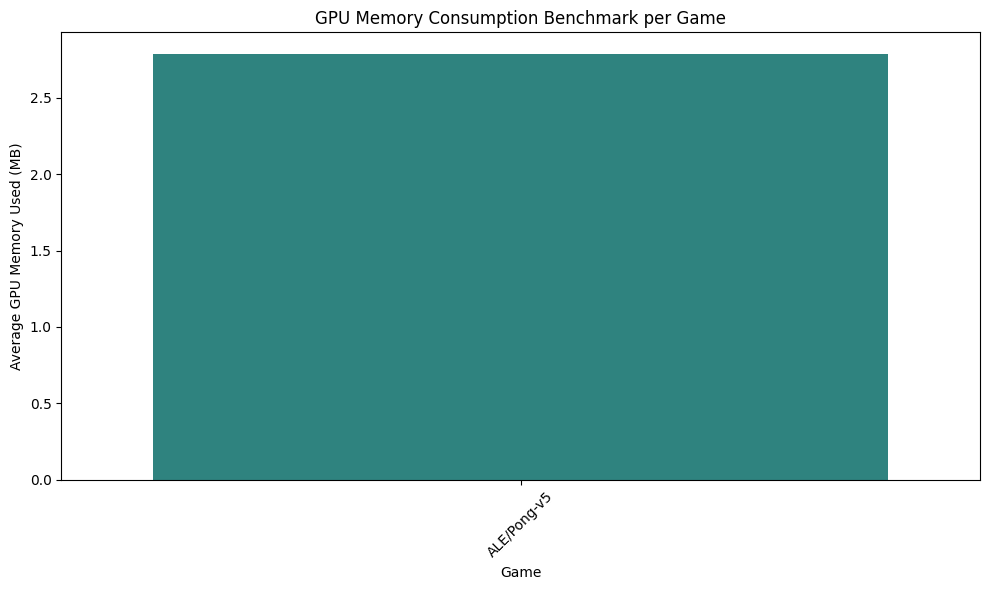

In [16]:
# Compute the difference in GPU memory consumption
df['gpu_memory_used'] = df['gpu_after_train'] - df['gpu_before_train']

# Group by game and compute the average memory consumption
memory_usage = df.groupby('game_name')['gpu_memory_used'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='game_name', y='gpu_memory_used', data=memory_usage, palette='viridis')
plt.xlabel('Game')
plt.ylabel('Average GPU Memory Used (MB)')
plt.title('GPU Memory Consumption Benchmark per Game')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()